In [1]:
import numpy as np    
import sympy as sym
from sympy import *
from sympy import lambdify
import matplotlib.pyplot as plt

In [2]:
#7
R = float(input())
n = int(input())

X,l1 = np.linspace(-R, R, n, retstep=True)
Y,l2 = np.linspace(-R, R, n, retstep=True)
grid = []

#Creación del grid
for x in X:
    for y in Y:
        cord = [x, y]
        grid.append(cord)

#ecuacion de la esfera
def f(cord):
    r = 0
    if np.linalg.norm(cord)<=R:
        z = np.sqrt(R**2 - cord[0]**2 - cord[1]**2)
        r=z
    return r

#Area de los cuadritos.
A = l1*l2 
V = 0
for i in range((n**2)-n-1):
    v = [f(grid[i]), f(grid[i+1]), f(grid[n+i]), f(grid[n+i+1])]
    h = np.mean(v)
    V+= h*A

Ve = (2/3)*np.pi*R
if np.allclose(V, Ve, rtol=1e-3):
    print("El programa funciona!")


1
100
El programa funciona!


In [3]:
#3
x, a, b, xm, fa, fb, fxm, h = sym.symbols('x, a, b, xm, fa, fb, fxm, h')
xm = (b-a)/2
h = b-a
px = ((x-b)*(x-xm)*fa)/((a-b)*(a-xm)) + ((x-a)*(x-b)*fxm)/((xm-a)*(xm-b)) + ((x-a)*(x-xm)*fb)/((b-a)*(b-xm))
collect(collect(collect(factor(simplify(integrate(px, (x, a, b)))), fa), fb), fxm)


-(a - b)*(fa*(7*a**2 + 6*a*b - b**2) + fb*(15*a**2 - 2*a*b - b**2) + fxm*(-4*a**2 + 8*a*b - 4*b**2))/(6*(a + b)*(3*a - b))

In [67]:
dv1 = factor(7*a**2+6*a*b-b**2)
dv2 = factor(15*a**2-2*a*b-b**2)
dv3 = factor(-4*a**2+8*a*b-4*b**2)
"""
Para que se pueda llegar a la expresión, y teniendo en cuenta que h=b-a, es necesario que los polinomios en términos de a y b
tengan factores en común entre sí. Pero con sympy se llega a esta encrucijada. Parece que ocurre una cancelación interesante,
ya que es posible ver el 4 multiplicando a f(xm)
"""
dv1, dv2, dv3

((a + b)*(7*a - b), (3*a - b)*(5*a + b), -4*(a - b)**2)

In [8]:
#17.1
#Finding the nodes and the weights.
"""
	Xi are the ith root of the laguerre Polynomials. As n=3, we must use the
    following polynomial: (1/6)*(-x^3+9x^2-18x+6). To find the weights, we must evaluate
    our roots in the n=4 polynomial: (1/24)*(x**4-16*x**3+72*x**2-96*x+24).
"""

#1. Newton Raphson

def Ln(n):
    x = sym.symbols("x")
    F = sym.exp(-x)*(x**n)
    expr = (sym.exp(x)/sym.factorial(n))*sym.diff(F, x, n)
    return lambdify([x], expr, 'numpy')


def df(f,x,h = 0.0001):
    
    d = 0.
    
    if h != 0:
        d = (f(x+h) - f(x-h))/(2*h)
        
    return d

def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-5):

    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn

def GetAllRoots(Function, Derivative, x,tolerancia=8):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonRaphson(Function,Derivative,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
        
    return Roots

X = np.linspace(0, 50, 100)
Xi = GetAllRoots(Ln(3), df, X)

#Weights
Wi = Xi/((4**2)*(Ln(4)(Xi)**2)) 
print(Xi, Wi)
#Writting the function in termos of e^x*f(x). Factorizing e^x in the denominator
#we get f(x)=x^3/(1-e^-x)

def f(x):
    return x**3/(1-np.exp(-x))

def gauss_integrate(Xi, Wi):
    gauss_int = np.sum(Wi*f(Xi))
    return gauss_int

gauss_integrate(Xi, Wi)

[0.41577456 2.29428036 6.28994508] [0.71109297 0.27851773 0.01038926]


6.481130172742926

1.5819767068693265 6.493939402266828
6.413727474093226 6.493939402266828
6.481130172742926 6.493939402266828
6.494535634534753 6.493939402266828
6.494313360074838 6.493939402266828
6.493941388108953 6.493939402266828
6.4939189605807535 6.493939402266828
6.493935646086899 6.493939402266828
6.493940188541971 6.493939402266828


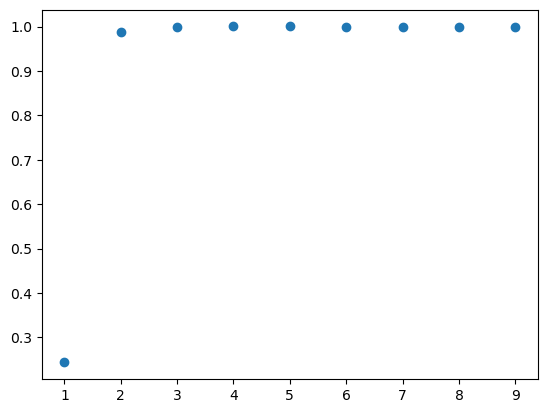

In [16]:
#17.2 -- Generalizing
def Generalization(n):
    x = np.linspace(0, 50, 100)
    X = GetAllRoots(Ln(n), df, x)
    W = X/(((n+1)**2)*((Ln(n+1)(X))**2))
    #print(X, W)
    A = gauss_integrate(X, W)
    return A

Vr = (np.pi**4)/15
data = []
n=10
for i in range(1, n):
    point = Generalization(i)/Vr
    print(Generalization(i), Vr)
    data.append(point)

plt.scatter(np.arange(1, 10), data)
    


In [ ]:
#18
